Evaluation of models trained on 5 core of Amazon Clothes dataset with hyperparameters:
loss: 'warp'
no_components: 240
learning_schedule: 'adadelta'
epsilon: 2.45e-07
rho: 0.958
item_alpha: 0
user_alpha: 2.06e-6
Item features (consisting of item's category) were passed to the models. Models were initialized with embeddings produced by word2vec.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse
import seaborn as sns
from tqdm.auto import tqdm

from utils import analyse_metrics, analyse_embeddings, reduce_item_embeddings

In [2]:
tqdm.pandas()
THREADS = 8

In [3]:
epochs = [5, 25, 50, 250, 500, 1000]
models = [pd.read_pickle(f'/pio/scratch/1/i313924/data/lightfm_data/model_{epochs}_word2vec_categories_item_alpha_0.pkl') for epochs in epochs]
train_interactions = scipy.sparse.load_npz('/pio/scratch/1/i313924/data/lightfm_data/5_core_interactions.npz')
test_interactions = scipy.sparse.load_npz('/pio/scratch/1/i313924/data/lightfm_data/5_core_test_interactions.npz')
dataset = pd.read_pickle('/pio/scratch/1/i313924/data/lightfm_data/5_core_dataset_features.pkl')
item_features = pd.read_pickle('/pio/scratch/1/i313924/data/lightfm_data/5_core_features.pkl')

In [4]:
categories = pd.read_json('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)
abx_path = '/pio/scratch/1/recommender_systems/interim/ABX_tests/5_core.json'

In [11]:
item_ids = list(dataset.mapping()[2].keys())
women_ids = categories[(categories.category_1 == "Women") & (categories.asin.isin(item_ids))].asin.values
men_ids = categories[(categories.category_1 == "Men") & (categories.asin.isin(item_ids))].asin.values

PCA prepared
EPOCH: 5
EPOCH: 25
EPOCH: 50
EPOCH: 250
EPOCH: 500
EPOCH: 1000


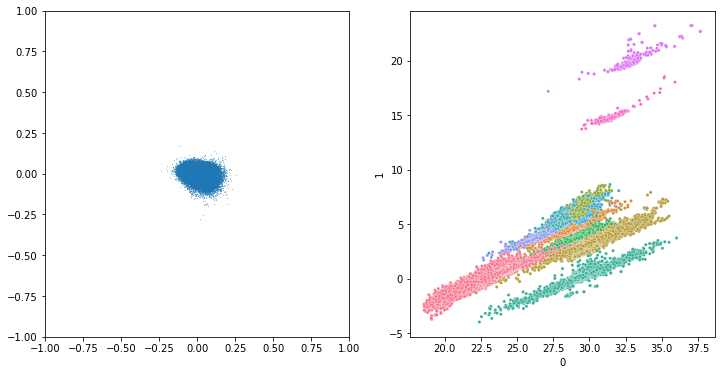

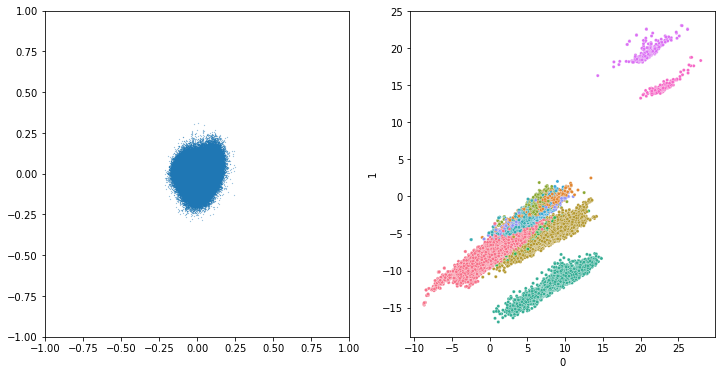

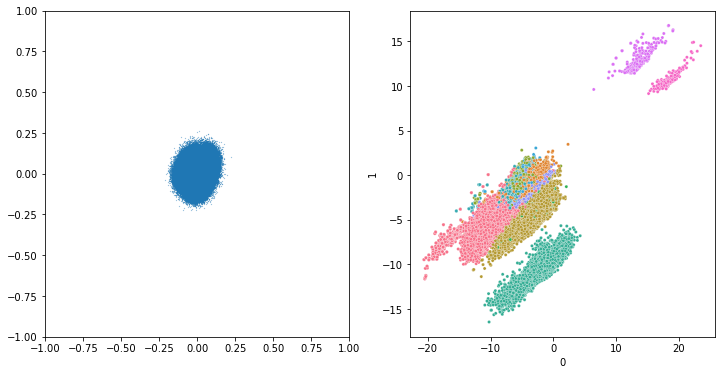

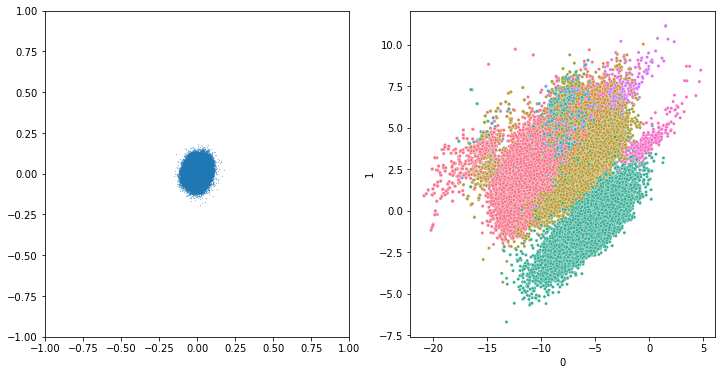

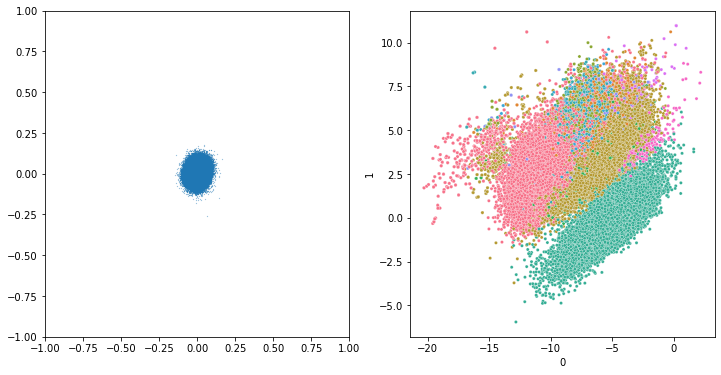

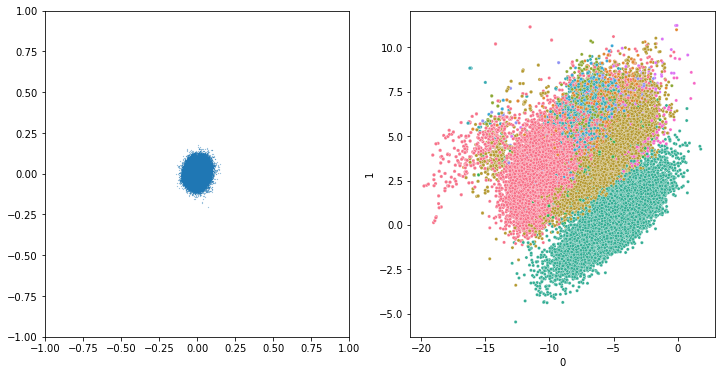

In [12]:
e, c, women_means, men_means, item_pca = analyse_embeddings(epochs, models, dataset, categories, abx_path, women_ids, men_ids, item_features=item_features)

Eucl dist


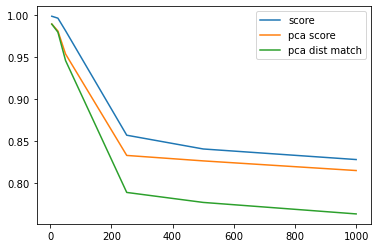

Cos dist


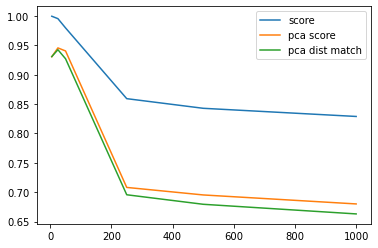

In [13]:
print("Eucl dist")
plt.plot(np.tile(epochs, (3, 1)).T, e)
plt.legend(["score", "pca score", "pca dist match"])
plt.show()
print("Cos dist")
plt.plot(np.tile(epochs, (3, 1)).T, c)
plt.legend(["score", "pca score", "pca dist match"])
plt.show()

In [14]:
e

[[0.9985, 0.9892, 0.9891],
 [0.9962, 0.9809, 0.9795],
 [0.9812, 0.9535, 0.9457],
 [0.8567, 0.8326, 0.7885],
 [0.8403, 0.8261, 0.7766],
 [0.8277, 0.8146, 0.7629]]

In [15]:
c

[[0.9996, 0.9307, 0.9309],
 [0.9955, 0.9457, 0.9426],
 [0.9797, 0.9405, 0.9272],
 [0.8593, 0.7082, 0.6957],
 [0.8429, 0.6954, 0.6795],
 [0.829, 0.6801, 0.6631]]

In [16]:
tqdm.pandas()
test_hit_rate_scores, test_recall_scores, test_precision_scores = analyse_metrics(models, train_interactions, test_interactions, dataset, item_features=item_features)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [17]:
test_recall_scores

[0.11758000000000002,
 0.1804,
 0.24890000000000004,
 0.30898000000000003,
 0.3050800000000001,
 0.30104000000000003]

In [18]:
test_precision_scores

[0.011758000000000001,
 0.01804,
 0.024890000000000002,
 0.030898000000000002,
 0.030508000000000004,
 0.030104000000000002]

In [19]:
test_hit_rate_scores

[0.1941, 0.333, 0.4872, 0.6269, 0.6204, 0.6104]

In [20]:
model = models[-1]
reduced_item_embeddings  = reduce_item_embeddings(model, dataset, categories, item_features=item_features)

In [21]:
reduced_item_embeddings.category_1.value_counts()

Women                                120759
Men                                   56380
Novelty & More                        18989
Girls                                 13115
Costumes & Accessories                 7832
Baby                                   7532
Luggage & Travel Gear                  7524
Boys                                   7392
Shoe, Jewelry & Watch Accessories      2926
Uniforms, Work & Safety                 349
Traditional & Cultural Wear             289
Name: category_1, dtype: int64

<AxesSubplot:xlabel='0', ylabel='1'>

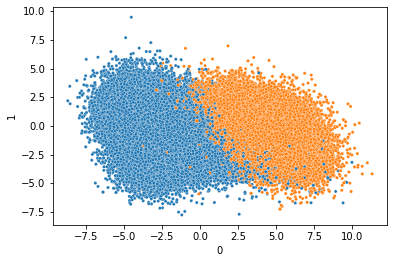

In [22]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Women', 'Men'])], hue='category_1', s=10, legend=False)

<AxesSubplot:xlabel='0', ylabel='1'>

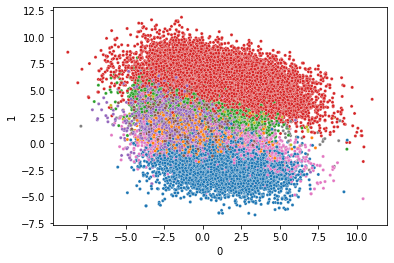

In [23]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[~reduced_item_embeddings['category_1'].isin(['Women', 'Men'])], hue='category_1', s=10, legend=False)

<AxesSubplot:xlabel='0', ylabel='1'>

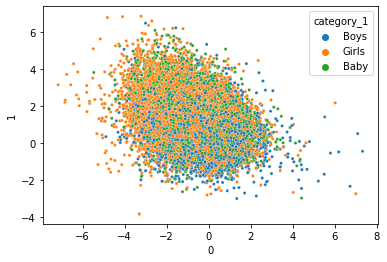

In [24]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Boys', 'Girls', 'Baby'])], hue='category_1', s=10, legend=True)

<AxesSubplot:xlabel='0', ylabel='1'>

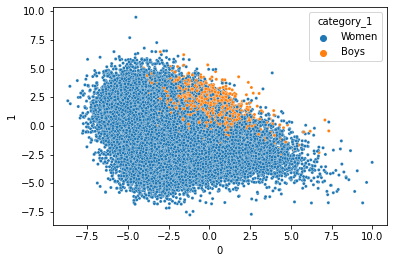

In [25]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Boys', 'Women'])], hue='category_1', s=10, legend=True)

<AxesSubplot:xlabel='0', ylabel='1'>

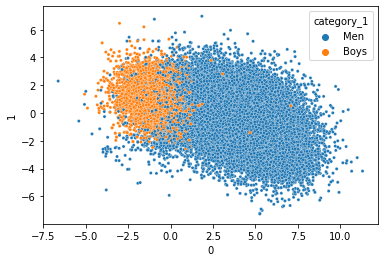

In [26]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Boys', 'Men'])], hue='category_1', s=10, legend=True)

<AxesSubplot:xlabel='0', ylabel='1'>

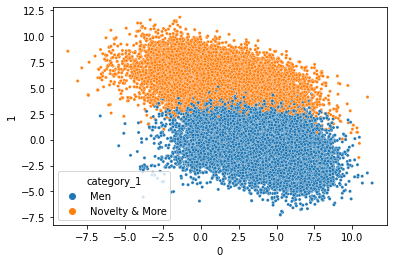

In [27]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Novelty & More', 'Men'])], hue='category_1', s=10, legend=True)

<AxesSubplot:xlabel='0', ylabel='1'>

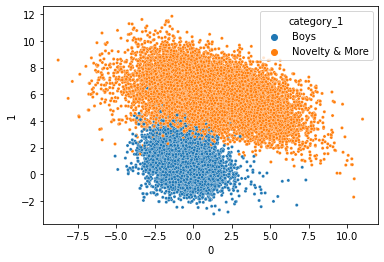

In [28]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Novelty & More', 'Boys'])], hue='category_1', s=10, legend=True)

<AxesSubplot:xlabel='0', ylabel='1'>

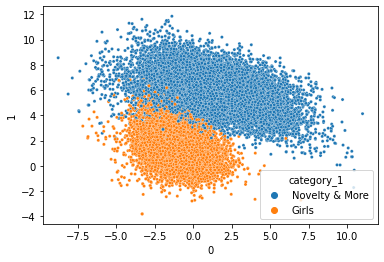

In [29]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Novelty & More', 'Girls'])], hue='category_1', s=10, legend=True)